In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("train_data_bigmart.csv")
test=pd.read_csv("test_data_bigmart.csv")

In [3]:
train.shape

(8523, 12)

In [4]:
test.shape

(5681, 11)

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train.info()
print("-"*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight       

In [8]:
# outlet size and item weight have null values in both train and test sets

In [9]:
train["Item_Outlet_Sales"].groupby(train["Item_Identifier"]).mean()

Item_Identifier
DRA12    1843.600200
DRA24    2246.218971
DRA59    2614.430150
DRB01    1518.024000
DRB13    2428.838400
DRB24    3050.695600
DRB25    1661.503900
DRB48     622.903457
DRC01     862.211000
DRC12    2237.420900
DRC13    1632.042250
DRC24    3152.895900
DRC25    1128.816343
DRC27    2743.428900
DRC36    3011.812880
DRC49    2828.318400
DRD01     851.025560
DRD12    1576.709514
DRD13    1232.681143
DRD15    2522.811314
DRD24    1965.156257
DRD25    1740.234750
DRD27    1269.813760
DRD37     892.172000
DRD49    3634.935100
DRD60    2605.275400
DRE01    2908.214400
DRE03     648.298971
DRE12    1546.875333
DRE13    1552.512440
            ...     
NCX05    1274.341200
NCX06    2897.561600
NCX17    3340.096667
NCX18    2413.049429
NCX29    1950.211425
NCX30    3921.562000
NCX41    2364.255800
NCX42    2631.241600
NCX53    2056.323300
NCX54    1678.672029
NCY05     670.460600
NCY06    2375.041760
NCY17     874.328560
NCY18    3229.721822
NCY29     749.857250
NCY30    2942.8360

In [10]:
train["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
DRE49     9
FDT07     9
NCY18     9
FDF56     9
FDQ40     9
FDV38     9
NCJ30     9
FDV60     9
FDX20     9
FDO19     9
NCQ06     9
FDU12     9
NCI54     9
FDG09     9
DRN47     9
FDD38     9
NCL31     9
FDW26     9
FDF52     9
NCF42     9
FDX04     9
FDW49     9
FDP25     9
FDX31     9
NCB18     9
NCK29     8
FDS52     8
FDI22     8
         ..
DRC24     2
FDM16     2
DRE01     2
NCM42     2
DRL59     2
FDE39     2
FDA48     2
FDZ50     2
NCV18     2
FDW10     2
NCW30     2
FDF38     2
NCG19     2
NCW05     2
FDE38     2
FDH22     2
FDW58     2
FDB10     2
FDI36     2
DRI59     2
FDR03     2
FDY43     1
FDQ60     1
FDC23     1
FDN52     1
FDT35     1
FDO33     1
DRF48     1
FDK57     1
FDE52     1
Name: Item_Identifier, dtype: int64

In [11]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
train["Item_Outlet_Sales"].groupby(pd.qcut(train["Item_MRP"],3)).mean()

Item_MRP
[31.29, 107.762]      1099.633828
(107.762, 172.367]    2148.453141
(172.367, 266.888]    3296.148945
Name: Item_Outlet_Sales, dtype: float64

In [13]:
train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [14]:
test["Outlet_Identifier"].value_counts()

OUT027    624
OUT013    621
OUT046    620
OUT049    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [15]:
train.columns[pd.isnull(train).any()].tolist()

['Item_Weight', 'Outlet_Size']

In [16]:
test.columns[pd.isnull(test).any().tolist()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [17]:
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())

In [18]:
test["Item_Weight"]=test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [19]:
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

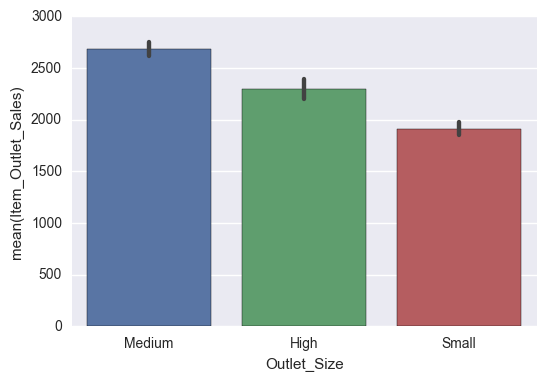

In [21]:
sns.barplot(train["Outlet_Size"],train["Item_Outlet_Sales"])

In [22]:
train.rename(columns = {'Item_Outlet_Sales':'Sales'})

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [23]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat")

In [25]:
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [26]:
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace("reg","Regular")

In [27]:
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
train["Outlet_Size"].isnull().values.sum()

2410

In [29]:
train.shape

(8523, 12)

In [30]:
8523-2410

6113

In [31]:
train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [32]:
train["Outlet_Identifier"].apply(lambda x:x.split("OUT0")[1]).value_counts()

27    935
13    932
46    930
49    930
35    930
45    929
18    928
17    926
10    555
19    528
Name: Outlet_Identifier, dtype: int64

In [33]:
train["Outlet_Identifier"]=train["Outlet_Identifier"].apply(lambda x:x.split("OUT0")[1])

In [34]:
train["Outlet_Identifier"].value_counts()

27    935
13    932
46    930
49    930
35    930
45    929
18    928
17    926
10    555
19    528
Name: Outlet_Identifier, dtype: int64

In [35]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
from sklearn.cross_validation import train_test_split

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
train["Item_Outlet_Sales"].groupby(pd.qcut(train["Item_Weight"],5)).mean()

Item_Weight
[4.555, 8.63]      2082.485186
(8.63, 12.35]      2090.585091
(12.35, 12.858]    2447.612062
(12.858, 17.06]    2147.190458
(17.06, 21.35]     2143.242221
Name: Item_Outlet_Sales, dtype: float64

In [41]:
# lets delete the rows containing null values from outlet size and store it in a new dataframe temp

In [42]:
temp=train[~train.Outlet_Size.isnull()]

In [43]:
temp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,18,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [44]:
new_train=train

In [45]:
new_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
new_train["Outlet_Size"]=new_train["Outlet_Size"].fillna("Medium")

In [47]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [49]:
new_test=test

In [50]:
new_test["Outlet_Size"]=new_test["Outlet_Size"].fillna("Medium")

In [51]:
# we will use temp as new train model and implement train test split on it

In [52]:
fat_mapping={"Low Fat":0,"Regular":1}
temp["Item_Fat_Content"]=temp["Item_Fat_Content"].map(fat_mapping)

C:\Users\UDIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [53]:
temp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,18,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [54]:
# we will do this for the original train model as well

In [55]:
fat_mapping={"Low Fat":0,"Regular":1}
train["Item_Fat_Content"]=train["Item_Fat_Content"].map(fat_mapping)

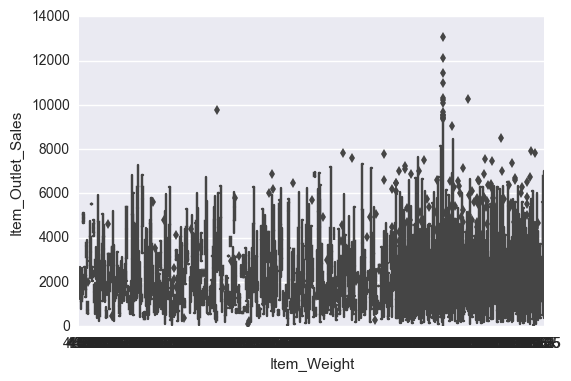

In [57]:
sns.boxplot(temp.Item_Weight,temp.Item_Outlet_Sales)

In [58]:
train["Item_Weight"]=train["Item_Weight"].round(1)
temp["Item_Weight"]=temp["Item_Weight"].round(1)

C:\Users\UDIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [64]:
train["Item_Outlet_Sales"].groupby(pd.qcut(train["Item_Weight"],3)).mean()

Item_Weight
[4.6, 11.1]     2089.212723
(11.1, 14.4]    2321.156582
(14.4, 21.4]    2134.082047
Name: Item_Outlet_Sales, dtype: float64

In [65]:
# we wont convert the item weight and mrp and use them as features as it is

In [66]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [67]:
itemtype_mapping={"Fruits and Vegetables":1,"Snack Foods":2,"Household":3,"Frozen Foods":4,"Dairy":5,"Canned":6,\
                 "Baking Goods":7,"Health and Hygiene":8,"Soft Drinks":9,"Meat":10,"Breads":11,"Hard Drinks":12,\
                 "Others":13,"Starchy Foods":14,"Breakfast":15,"Seafood":16}

In [68]:
train["Item_Type"]=train["Item_Type"].map(itemtype_mapping)
temp["Item_Type"]=temp["Item_Type"].map(itemtype_mapping)

C:\Users\UDIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [69]:
temp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,0,0.016047,5,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.9,1,0.019278,9,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,0,0.016760,10,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.9,0,0.000000,3,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.4,1,0.000000,7,51.4008,18,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [70]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,0,0.016047,5,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.9,1,0.019278,9,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,0,0.016760,10,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,1,0.000000,1,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.9,0,0.000000,3,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [71]:
outletsize_mapping={"Small":1,"Medium":2,"High":3}
train["Outlet_Size"]=train["Outlet_Size"].map(outletsize_mapping)
temp["Outlet_Size"]=temp["Outlet_Size"].map(outletsize_mapping)

C:\Users\UDIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [72]:
train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [73]:
outlettype_mapping={"Supermarket Type1":1,"Supermarket Type2":2,"Supermarket Type3":3,"Grocery Store":4}
train["Outlet_Type"]=train["Outlet_Type"].map(outlettype_mapping)
temp["Outlet_Type"]=temp["Outlet_Type"].map(outlettype_mapping)

C:\Users\UDIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [74]:
train["Item_MRP"]=train["Item_MRP"].round(2)
temp["Item_MRP"]=temp["Item_MRP"].round(2)

C:\Users\UDIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [75]:
train.info()
print("-"*40)
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int64
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int64
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 799.1+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              6113 non-null object
Item_Weight                  611

In [76]:
train["Outlet_Identifier"]=train["Outlet_Identifier"].astype(int)
temp["Outlet_Identifier"]=temp["Outlet_Identifier"].astype(int)

C:\Users\UDIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [77]:
train.info()
print("-"*40)
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int64
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int32
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int64
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int32(1), int64(5), object(2)
memory usage: 765.8+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              6113 non-null object
Item_Weight            

In [101]:
train_features=["Item_Weight","Item_Fat_Content","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year",\
               "Outlet_Size","Outlet_Type"]

In [102]:
temp_features=["Item_Weight","Item_Fat_Content","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year",\
               "Outlet_Size","Outlet_Type"]

In [103]:
# we will implement train-test split on train and temp set with 30% used for testing

In [104]:
X1=train[train_features]
X2=temp[temp_features]

In [105]:
y1=list(train.Item_Outlet_Sales.values)
y2=list(temp.Item_Outlet_Sales.values)

In [106]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=1)

In [107]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=1)

In [108]:
# to find rmse

In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
X1_train.shape

(5966, 8)

In [111]:
X2_train.shape

(4279, 8)

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

In [113]:
from sklearn.cross_validation import cross_val_score

In [114]:
from sklearn import metrics

In [115]:
from sklearn.metrics import accuracy_score

In [133]:
linreg=LinearRegression()
my_linreg=linreg.fit(X1_train,y1_train)
pred_linreg=my_linreg.predict(X1_test)
rmse1=mean_squared_error(y1_test,pred_linreg)**0.5
print(rmse1)
print(metrics.accuracy_score(y1_test,pred_linreg))#this line is used only for classification type of problems

1309.94133767


ValueError: continuous is not supported

In [120]:
randomforest=RandomForestRegressor()
my_forest=randomforest.fit(X1_train,y1_train)
pred_forest=my_forest.predict(X1_test)
rmse1=mean_squared_error(y1_test,pred_forest)**0.5
print(rmse1)

1173.44406426


In [127]:
randomforest=RandomForestRegressor(random_state=1)
my_forest=randomforest.fit(X1_train,y1_train)
pred_forest=my_forest.predict(X1_test)
rmse1=mean_squared_error(y1_test,pred_forest)**0.5
print(rmse1)

1182.11368642


In [128]:
tree=DecisionTreeRegressor(random_state=1)
my_tree=tree.fit(X1_train,y1_train)
pred_tree=my_tree.predict(X1_test)
rmse1=mean_squared_error(y1_test,pred_tree)**0.5
print(rmse1)

1512.77372976


In [195]:
gb=GradientBoostingRegressor(min_samples_split=2, min_samples_leaf=4,max_depth=5,random_state=1, max_features=3, max_leaf_nodes=5)
my_gb=gb.fit(X1_train,y1_train)
pred_gb=my_gb.predict(X1_test)
rmse1=mean_squared_error(y1_test,pred_gb)**0.5
print(rmse1)

1063.66573803


In [132]:
# checking the models for temp dataset

In [134]:
linreg=LinearRegression()
my_linreg=linreg.fit(X2_train,y2_train)
pred_linreg=my_linreg.predict(X2_test)
rmse1=mean_squared_error(y2_test,pred_linreg)**0.5
print(rmse1)

1351.3716061


In [135]:
randomforest=RandomForestRegressor(random_state=1)
my_forest=randomforest.fit(X2_train,y2_train)
pred_forest=my_forest.predict(X2_test)
rmse1=mean_squared_error(y2_test,pred_forest)**0.5
print(rmse1)

1207.87027444


In [136]:
tree=DecisionTreeRegressor(random_state=1)
my_tree=tree.fit(X2_train,y2_train)
pred_tree=my_tree.predict(X2_test)
rmse1=mean_squared_error(y2_test,pred_tree)**0.5
print(rmse1)

1555.42289109


In [137]:
gb=GradientBoostingRegressor(random_state=1)
my_gb=gb.fit(X2_train,y2_train)
pred_gb=my_gb.predict(X2_test)
rmse1=mean_squared_error(y2_test,pred_gb)**0.5
print(rmse1)

1104.88141214


In [138]:
# now we will take train dataset and not temp dataset as our training model and gradientboosting regressor as the
# modeller

In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [140]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [141]:
test["Item_Weight"]=test["Item_Weight"].round(1)
test["Item_MRP"]=test["Item_MRP"].round(2)

In [142]:
test["Item_Fat_Content"]=test["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat")
test["Item_Fat_Content"]=test["Item_Fat_Content"].replace("reg","Regular")

In [143]:
test["Outlet_Identifier"]=test["Outlet_Identifier"].apply(lambda x:x.split("OUT0")[1])

In [144]:
fat_mapping={"Low Fat":0,"Regular":1}
test["Item_Fat_Content"]=test["Item_Fat_Content"].map(fat_mapping)

In [145]:
itemtype_mapping={"Fruits and Vegetables":1,"Snack Foods":2,"Household":3,"Frozen Foods":4,"Dairy":5,"Canned":6,\
                 "Baking Goods":7,"Health and Hygiene":8,"Soft Drinks":9,"Meat":10,"Breads":11,"Hard Drinks":12,\
                 "Others":13,"Starchy Foods":14,"Breakfast":15,"Seafood":16}
test["Item_Type"]=test["Item_Type"].map(itemtype_mapping)

In [146]:
outlettype_mapping={"Supermarket Type1":1,"Supermarket Type2":2,"Supermarket Type3":3,"Grocery Store":4}
test["Outlet_Type"]=test["Outlet_Type"].map(outlettype_mapping)

In [147]:
outletsize_mapping={"Small":1,"Medium":2,"High":3}
test["Outlet_Size"]=test["Outlet_Size"].map(outletsize_mapping)

In [148]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null int64
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null int64
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null int64
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 488.3+ KB


In [149]:
test["Outlet_Identifier"]=test["Outlet_Identifier"].astype(int)

In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null int64
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null int64
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null int32
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null int64
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null int64
dtypes: float64(3), int32(1), int64(5), object(2)
memory usage: 466.1+ KB


In [151]:
train_features=["Item_Weight","Item_Fat_Content","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year",\
               "Outlet_Size","Outlet_Type"]
X=train[train_features]
y=list(train.Item_Outlet_Sales.values)
test_features=test[["Item_Weight","Item_Fat_Content","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year",\
               "Outlet_Size","Outlet_Type"]].values

In [152]:
gb=GradientBoostingRegressor(random_state=1)
my_gb=gb.fit(X,y)
pred_gb=my_gb.predict(test_features)

In [153]:
test["Item_Outlet_Sales"]=pred_gb

In [154]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.8,0,0.007565,2,107.86,49,1999,2,Tier 1,1,1552.201435
1,FDW14,8.3,1,0.038428,5,87.32,17,2007,2,Tier 2,1,1396.878321
2,NCN55,14.6,0,0.099575,13,241.75,10,1998,2,Tier 3,4,594.868291
3,FDQ58,7.3,0,0.015388,2,155.03,17,2007,2,Tier 2,1,2473.199690
4,FDY38,12.7,1,0.118599,5,234.23,27,1985,2,Tier 3,3,5972.657644


In [155]:
test.to_excel("BigMartSales_GB.xlsx")

In [156]:
# here, outlet_identifier needs to be converted to a string and then OUT0 must be prefixed

In [158]:
test["Outlet_Identifier"]=test["Outlet_Identifier"].astype(str)

In [159]:
test["out0"]="OUT0"

In [161]:
test["Outlet_Identifier"]=pd.Series(test["out0"]).str.cat(test["Outlet_Identifier"],sep="")

In [162]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,out0
0,FDW58,20.8,0,0.007565,2,107.86,OUT049,1999,2,Tier 1,1,1552.201435,OUT0
1,FDW14,8.3,1,0.038428,5,87.32,OUT017,2007,2,Tier 2,1,1396.878321,OUT0
2,NCN55,14.6,0,0.099575,13,241.75,OUT010,1998,2,Tier 3,4,594.868291,OUT0
3,FDQ58,7.3,0,0.015388,2,155.03,OUT017,2007,2,Tier 2,1,2473.199690,OUT0
4,FDY38,12.7,1,0.118599,5,234.23,OUT027,1985,2,Tier 3,3,5972.657644,OUT0


In [163]:
test.to_excel("BigMartSales_GradBoosting.xlsx")

In [196]:
gb=GradientBoostingRegressor(min_samples_split=2, min_samples_leaf=4,max_depth=5,random_state=1, max_features=3, max_leaf_nodes=5)
my_gb=gb.fit(X,y)
pred_gb=my_gb.predict(test_features)

In [197]:
test["Item_Outlet_Sales_2"]=pred_gb

In [198]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,out0,Item_Outlet_Sales_2
0,FDW58,20.8,0,0.007565,2,107.86,OUT049,1999,2,Tier 1,1,1552.201435,OUT0,1463.278190
1,FDW14,8.3,1,0.038428,5,87.32,OUT017,2007,2,Tier 2,1,1396.878321,OUT0,1361.417875
2,NCN55,14.6,0,0.099575,13,241.75,OUT010,1998,2,Tier 3,4,594.868291,OUT0,633.938260
3,FDQ58,7.3,0,0.015388,2,155.03,OUT017,2007,2,Tier 2,1,2473.199690,OUT0,2456.642560
4,FDY38,12.7,1,0.118599,5,234.23,OUT027,1985,2,Tier 3,3,5972.657644,OUT0,5781.101638


In [199]:
test.to_excel("BigMartSales_GradBoosting2.xlsx")